In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle
%matplotlib inline

In [15]:
path_data = '/Users/jqmviegas/src/datascience-training-model-optimization/database/raw_data.csv'
df = pd.read_csv(path_data)
df = df.pivot_table(index='dt', values='value', columns='sensor')
df.head()

sensor,u1,u2,y1,y2,y3,y4
dt,,,,,,
2019-01-01 00:00:00,0.331368,0.298956,0.500013,0.500007,0.501683,0.500254
2019-01-01 00:00:10,0.299739,0.260098,0.500035,0.500007,0.501772,0.498577
2019-01-01 00:00:20,0.221685,0.306374,0.500036,0.499980,0.499135,0.497115
2019-01-01 00:00:30,0.143631,0.352650,0.499980,0.499936,0.492666,0.497972
2019-01-01 00:00:40,0.230246,0.276930,0.499841,0.499882,0.486523,0.498077


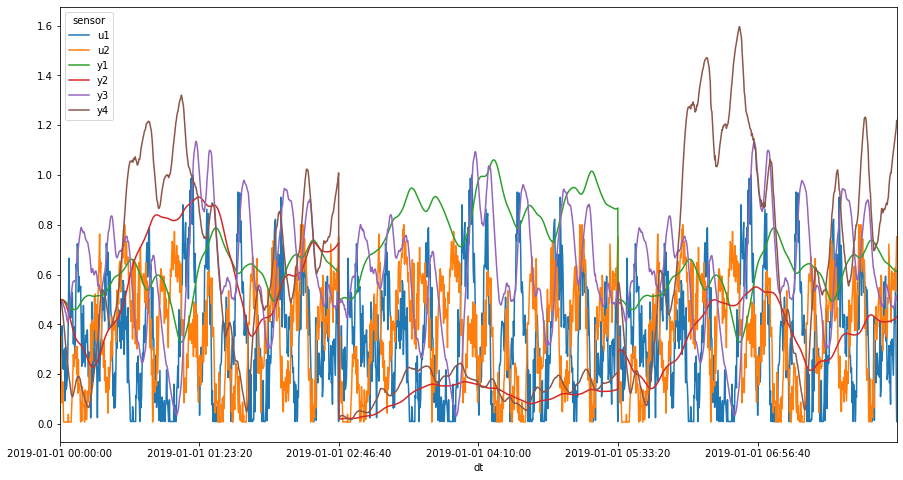

In [16]:
df.plot(figsize=(15, 8))

In [17]:
feat_lags = {'y2': [6], 'u1': [2, 6, 7, 8], 'u2': [2, 6, 7, 8]}
max_lag = 0
for feat in feat_lags:
    lags = feat_lags[feat]
    
    for lag in lags:
       df[feat+'l'+str(lag)] = df[feat].shift(lag) 
    
    if lag > max_lag:
        max_lag = lag

df = df.iloc[max_lag:]

In [18]:
inputs = [
    'y2l6',
    'u1l2',
    'u2l2',
    'u2l6',
    'u1l6'
]

outputs = [
    'y2'
]

In [19]:
X_train, y_train = df[inputs].iloc[:2000], df[outputs].iloc[:2000].values.ravel()
X_test, y_test = df[inputs].iloc[:], df[outputs].iloc[:].values.ravel()

In [20]:
model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [21]:
y_test_pred = model.predict(X_test)

In [22]:
df = df.reset_index()
df['y2_pred'] = 0
df.loc[:, 'y2_pred'] = y_test_pred

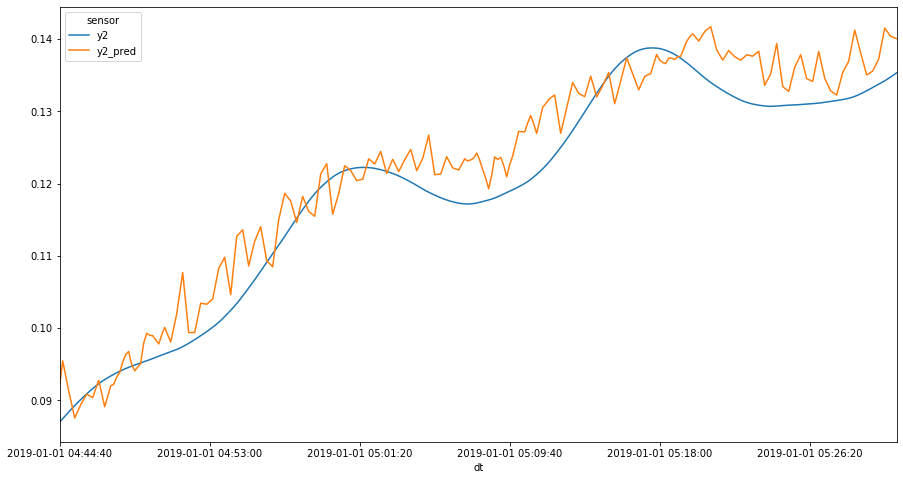

In [23]:
df.set_index('dt')[['y2', 'y2_pred']].iloc[1700:1980].plot(figsize=(15, 8))

In [24]:
rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('RMSE = {}'.format(rmse))

RMSE = 0.0335761382751654


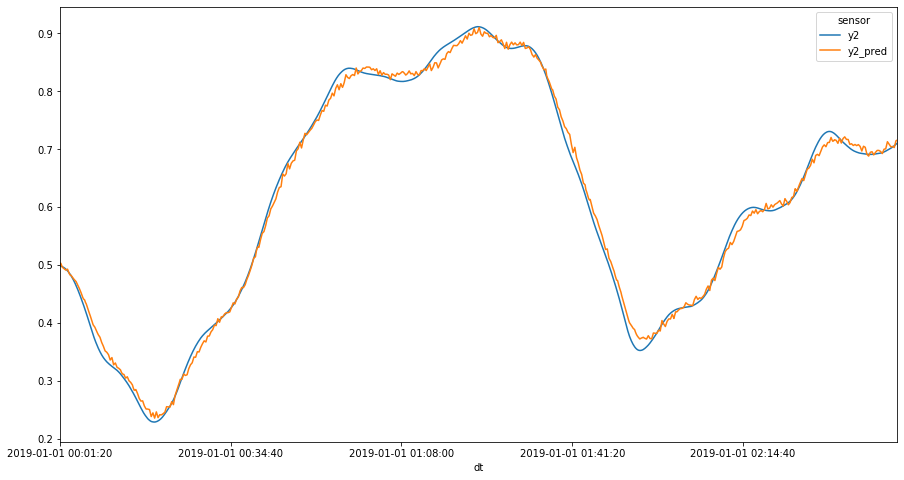

In [25]:
X_train, y_train = df[inputs].iloc[:650], df[outputs].iloc[:650].values.ravel()
X_test, y_test = df[inputs].iloc[:981], df[outputs].iloc[:981].values.ravel()
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
df['y2_pred'] = 0
df.loc[:980, 'y2_pred'] = y_test_pred
df.set_index('dt')[['y2', 'y2_pred']].iloc[:981].plot(figsize=(15, 8))


path_model = '/Users/jqmviegas/src/datascience-training-model-optimization/models/lr.pkl'
pickle.dump(model, open(path_model, 'wb'))

In [26]:
df

sensor,dt,u1,u2,y1,y2,y3,y4,y2l6,u1l2,u1l6,u1l7,u1l8,u2l2,u2l6,u2l7,u2l8,y2_pred
0,2019-01-01 00:01:20,0.342844,0.105303,0.498942,0.499049,0.484800,0.470375,0.499980,0.304215,0.221685,0.299739,0.331368,0.163663,0.306374,0.260098,0.298956,0.501816
1,2019-01-01 00:01:30,0.394117,0.084490,0.498675,0.498580,0.487783,0.460013,0.499936,0.291570,0.143631,0.221685,0.299739,0.126116,0.352650,0.306374,0.260098,0.503555
2,2019-01-01 00:01:40,0.310562,0.127084,0.498417,0.497996,0.489910,0.450363,0.499882,0.342844,0.230246,0.143631,0.221685,0.105303,0.276930,0.352650,0.306374,0.499998
3,2019-01-01 00:01:50,0.227008,0.169678,0.498136,0.497309,0.487858,0.442984,0.499795,0.394117,0.316861,0.230246,0.143631,0.084490,0.201211,0.276930,0.352650,0.496408
4,2019-01-01 00:02:00,0.223275,0.113875,0.497792,0.496529,0.483679,0.435392,0.499643,0.310562,0.304215,0.316861,0.230246,0.127084,0.163663,0.201211,0.276930,0.495124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2019-01-01 08:19:00,0.620493,0.531781,0.614231,0.425778,0.508814,1.163774,0.419883,0.407021,0.338474,0.267060,0.195646,0.626364,0.578267,0.558483,0.538700,0.000000
2987,2019-01-01 08:19:10,0.444620,0.586785,0.613919,0.427064,0.512898,1.175332,0.420669,0.513757,0.406739,0.338474,0.267060,0.579073,0.567239,0.578267,0.558483,0.000000
2988,2019-01-01 08:19:20,0.268747,0.641789,0.613759,0.428353,0.515008,1.186738,0.421554,0.620493,0.475004,0.406739,0.338474,0.531781,0.556212,0.567239,0.578267,0.000000
2989,2019-01-01 08:19:30,0.092874,0.696792,0.613600,0.429498,0.508298,1.201057,0.422544,0.444620,0.441012,0.475004,0.406739,0.586785,0.591288,0.556212,0.567239,0.000000


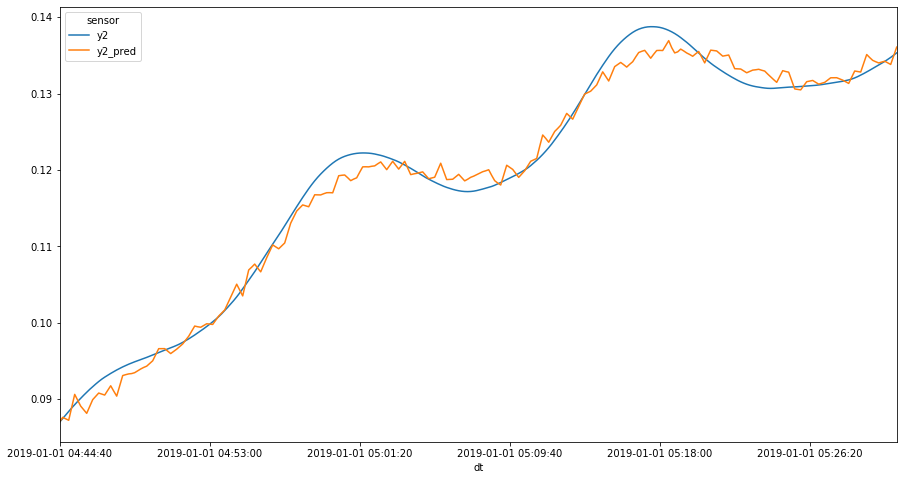

In [27]:
X_train, y_train = df[inputs].iloc[1000:1700], df[outputs].iloc[1000:1700].values.ravel()
X_test, y_test = df[inputs].iloc[1700:1980], df[outputs].iloc[1700:1980].values.ravel()
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
df['y2_pred'] = 0
df.loc[1700:1979, 'y2_pred'] = y_test_pred
df.set_index('dt')[['y2', 'y2_pred']].iloc[1700:1980].plot(figsize=(15, 8))

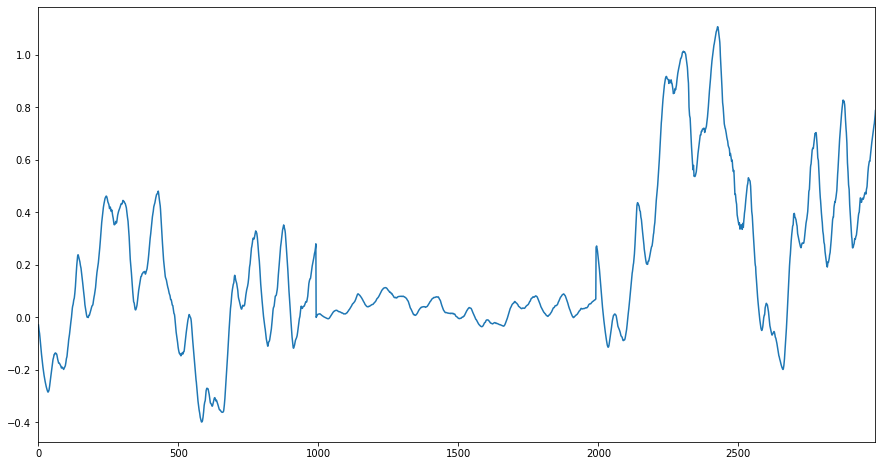

In [28]:
(df['y4']-df['y2']).plot(figsize=(15, 8))